In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('daily_min_temp.csv',index_col="Date",parse_dates=["Date"])
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [3]:
df=df.resample('M').mean()
df

,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323
...,...
1990-08-31,7.825806
1990-09-30,9.166667
1990-10-31,11.345161


<AxesSubplot: xlabel='Date'>

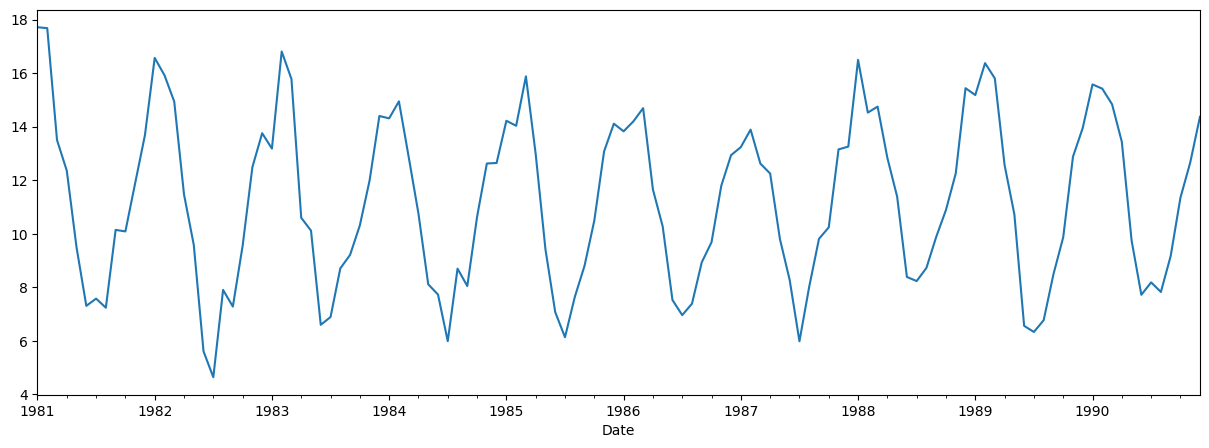

In [4]:
df.Temp.plot(figsize=(15,5))

In [5]:
cols=list()

In [6]:
for i in range(1,0,-1):
    cols.append(df.shift(i))
cols

[                 Temp
 Date                 
 1981-01-31        NaN
 1981-02-28  17.712903
 1981-03-31  17.678571
 1981-04-30  13.500000
 1981-05-31  12.356667
 ...               ...
 1990-08-31   8.183871
 1990-09-30   7.825806
 1990-10-31   9.166667
 1990-11-30  11.345161
 1990-12-31  12.656667
 
 [120 rows x 1 columns]]

In [7]:
agg = pd.concat(cols, axis=1)
agg['y']=df['Temp']
agg.dropna(inplace=True)
agg

,Temp,y
Date,,
1981-02-28,17.712903,17.678571
1981-03-31,17.678571,13.500000
1981-04-30,13.500000,12.356667
1981-05-31,12.356667,9.490323
1981-06-30,9.490323,7.306667
...,...,...
1990-08-31,8.183871,7.825806
1990-09-30,7.825806,9.166667
1990-10-31,9.166667,11.345161


### Train test split

In [8]:
train=agg.head(len(agg)-10)
train

,Temp,y
Date,,
1981-02-28,17.712903,17.678571
1981-03-31,17.678571,13.500000
1981-04-30,13.500000,12.356667
1981-05-31,12.356667,9.490323
1981-06-30,9.490323,7.306667
...,...,...
1989-10-31,8.486667,9.867742
1989-11-30,9.867742,12.876667
1989-12-31,12.876667,13.951613


In [9]:
test=agg.tail(12)
test

,Temp,y
Date,,
1990-01-31,13.951613,15.577419
1990-02-28,15.577419,15.417857
1990-03-31,15.417857,14.835484
1990-04-30,14.835484,13.433333
1990-05-31,13.433333,9.748387
1990-06-30,9.748387,7.720000
1990-07-31,7.720000,8.183871
1990-08-31,8.183871,7.825806
1990-09-30,7.825806,9.166667


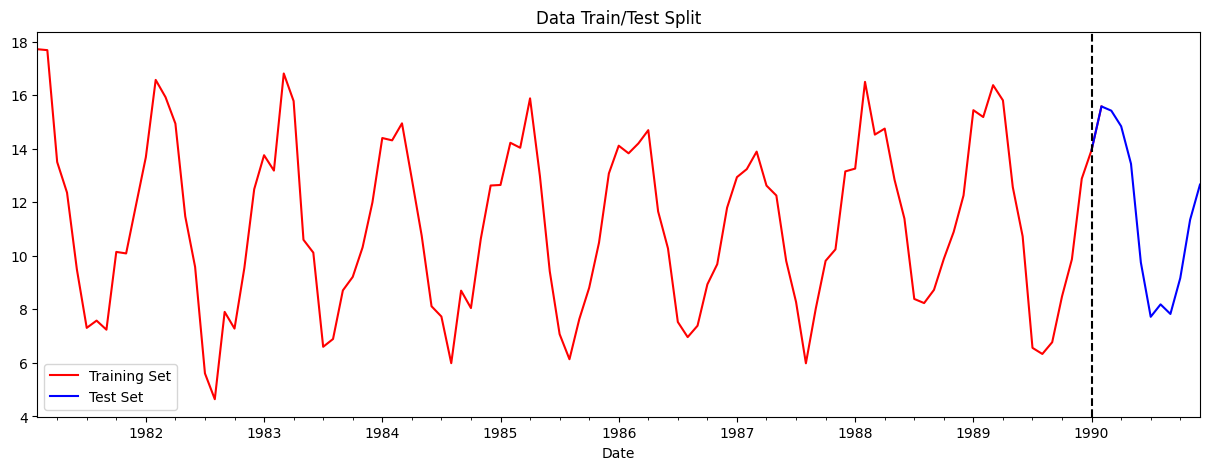

In [10]:
cutoff="1990-01-31"
fig, ax = plt.subplots(figsize=(15, 5))
train['Temp'].plot(ax=ax, label='Training Set', title='Data Train/Test Split',color="r")
test['Temp'].plot(ax=ax, label='Test Set',color="b")
ax.axvline(cutoff, color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [11]:
VARIABLE = ['Temp']
TARGET = 'y'

X_train = train[VARIABLE]
y_train = train[TARGET]

X_test = test[VARIABLE]
y_test = test[TARGET]

### Modeling

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### Prediction

In [13]:
test['prediction'] = reg.predict(X_test)
test

C:\Users\user\AppData\Local\Temp\ipykernel_4196\2874089957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


,Temp,y,prediction
Date,,,
1990-01-31,13.951613,15.577419,13.361226
1990-02-28,15.577419,15.417857,14.652208
1990-03-31,15.417857,14.835484,14.525506
1990-04-30,14.835484,13.433333,14.063069
1990-05-31,13.433333,9.748387,12.949683
1990-06-30,9.748387,7.720000,10.023629
1990-07-31,7.720000,8.183871,8.412975
1990-08-31,8.183871,7.825806,8.781315
1990-09-30,7.825806,9.166667,8.496991


In [14]:
test=test.drop(columns=['Temp'])
test

,y,prediction
Date,,
1990-01-31,15.577419,13.361226
1990-02-28,15.417857,14.652208
1990-03-31,14.835484,14.525506
1990-04-30,13.433333,14.063069
1990-05-31,9.748387,12.949683
1990-06-30,7.720000,10.023629
1990-07-31,8.183871,8.412975
1990-08-31,7.825806,8.781315
1990-09-30,9.166667,8.496991


### Evaluation

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = np.sqrt(mean_squared_error(test['y'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')
print("MSE Score on Test set: "+ str(mean_squared_error(test['y'], test['prediction'])))
print("MAE Score on Test set: "+ str(mean_absolute_error(test['y'], test['prediction'])))

RMSE Score on Test set: 1.64
MSE Score on Test set: 2.6786560079634145
MAE Score on Test set: 1.3720088278206932


### Visualisasi

In [16]:
df_new = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
df_new

,Temp,prediction
Date,,
1981-01-31,17.712903,NaN
1981-02-28,17.678571,NaN
1981-03-31,13.500000,NaN
1981-04-30,12.356667,NaN
1981-05-31,9.490323,NaN
...,...,...
1990-08-31,7.825806,8.781315
1990-09-30,9.166667,8.496991
1990-10-31,11.345161,9.561710


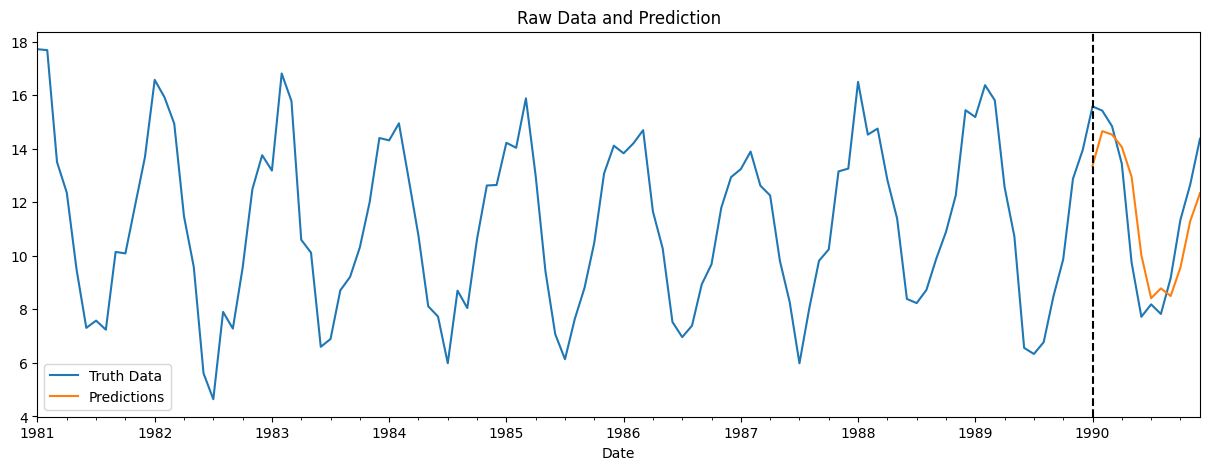

In [17]:
ax = df[['Temp']].plot(figsize=(15, 5))
df_new['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
ax.axvline(cutoff, color='black', ls='--')
plt.show()

### Forecasting

In [18]:
test.tail(1)['prediction'].iloc[0]

12.332965825581994

In [20]:
predictions2=[]
for i in range(10):
    forecast=pd.DataFrame([])
    forecast['Temp']=[test.tail(1)['prediction'].iloc[0]]
    testX = forecast
    pred = reg.predict(testX)
    test.loc[len(test.index)]=["",pred[0]] 

In [21]:
test

,y,prediction
Date,,
1990-01-31 00:00:00,15.577419,13.361226
1990-02-28 00:00:00,15.417857,14.652208
1990-03-31 00:00:00,14.835484,14.525506
1990-04-30 00:00:00,13.433333,14.063069
1990-05-31 00:00:00,9.748387,12.949683
1990-06-30 00:00:00,7.72,10.023629
1990-07-31 00:00:00,8.183871,8.412975
1990-08-31 00:00:00,7.825806,8.781315
1990-09-30 00:00:00,9.166667,8.496991


In [22]:
test.reset_index(inplace=True)
test=test.drop(["Date","y"], axis=1)
test['Date']=pd.Series(pd.date_range('19900131',freq='M',periods=len(test)))
test=test.set_index('Date')

In [23]:
test

,prediction
Date,
1990-01-31,13.361226
1990-02-28,14.652208
1990-03-31,14.525506
1990-04-30,14.063069
1990-05-31,12.949683
1990-06-30,10.023629
1990-07-31,8.412975
1990-08-31,8.781315
1990-09-30,8.496991


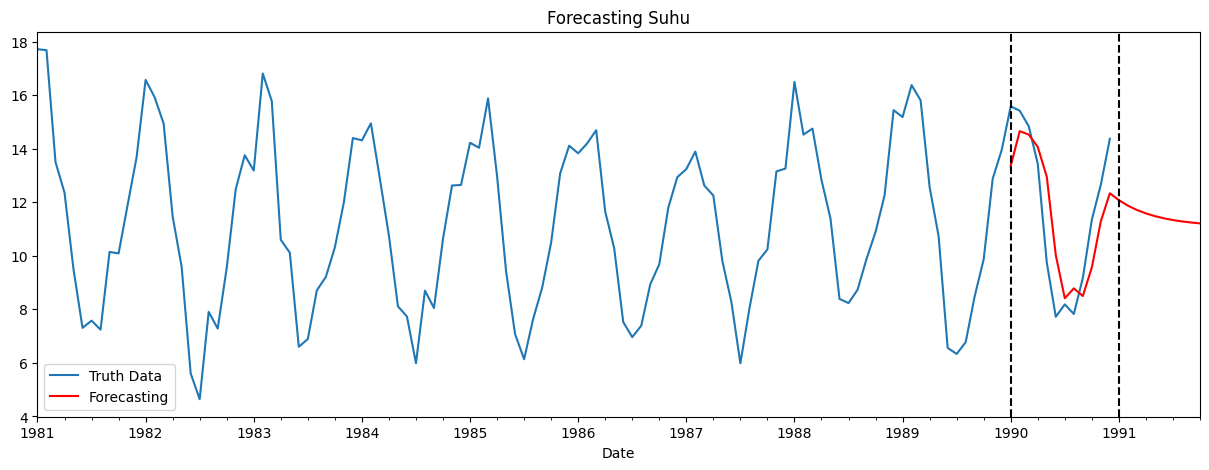

In [25]:
ax=df.Temp.plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='r')
plt.legend(['Truth Data', 'Forecasting'])
ax.set_title('Forecasting Suhu')
ax.axvline("1990-01-31", color='black', ls='--')
ax.axvline("1991-01-31", color='black', ls='--')
plt.show()